   ### Mercedes- Benz Greener Manufacturing
   
### Description

Reduce the time a Mercedes-Benz spends on the test bench.

- Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

- If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
- Check for null and unique values for test and train sets.
- Apply label encoder.
- Perform dimensionality reduction.
- Predict your test_df values using XGBoost.

In [1]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score, mean_squared_error
import warnings

In [2]:
#Suppressing warnings for better readability
warnings.filterwarnings("ignore")

In [3]:
#Importing train_data
train_df = pd.read_csv("train.csv")
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Importing test_data
test_df = pd.read_csv("test.csv")
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
test_df.shape

(4209, 377)

In [6]:
#Checking the data type of train_df
train_df.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [7]:
#Information about train_data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [8]:
#Printing categorical features in the dataset
print("Categorical Features:")
for i in train_df.columns:
    if train_df[i].dtypes == 'object':
        print(i)

Categorical Features:
X0
X1
X2
X3
X4
X5
X6
X8


In [9]:
# Removing the columns 'ID' and 'y' from the data as they are not so important for learning
X_train = train_df.drop(['ID','y'], axis =1)
X_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train.shape

(4209, 376)

In [11]:
#Storing the target feature in y_target
y_train = train_df['y']

In [12]:
y_train.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [13]:
y_train_copy = y_train.copy()

In [14]:
y_train.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [15]:
id_test = test_df['ID'].values

In [16]:
X_test = test_df.drop('ID', axis = 1)

In [17]:
X_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
X_test.shape

(4209, 376)

### Removing Features with Zero Variance

In [19]:
#Separating numerical features for applying VarianceThreshold
X_train_numerical_features = X_train.iloc[:, 8:]

In [20]:
#Initializing VarianceThreshold with desired threshold (In this case it is Zero)
var_thres = VarianceThreshold(threshold = 0)

In [21]:
#Fitting the VarianceThreshold to the numerical features
var_thres.fit(X_train_numerical_features)

VarianceThreshold(threshold=0)

In [22]:
#Finding the non-constant features
non_constant_features = X_train_numerical_features.columns[var_thres.get_support()]

In [23]:
#Displaying the non-constant features
print('Non-constant features: ', non_constant_features)

Non-constant features:  Index(['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=356)


In [24]:
constant_columns = [column for column in X_train_numerical_features.columns if column not in X_train_numerical_features.columns[var_thres.get_support()]]

In [25]:
for column in constant_columns:
    print(column)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X347


In [26]:
X_train_numerical_features.drop(constant_columns, axis = 1, inplace = True)

In [27]:
#Displaying after removing the columns having zero variance 
X_train_numerical_features.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Applying Label Encoder

In [28]:
#Applying Label Encoder to categorical features
LE = LabelEncoder()

In [29]:
X_train_categorical_features = X_train.iloc[:, 0:8]

In [30]:
X_train_categorical_features = X_train_categorical_features.apply(LE.fit_transform)

In [31]:
X_train_categorical_features.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


In [32]:
#Concatenating categorical and numerical features
Final_X_train = pd.concat([X_train_categorical_features,X_train_numerical_features], axis = 1)

In [33]:
Final_X_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
Final_X_train.shape

(4209, 364)

In [35]:
y_train.shape

(4209,)

### Applying the same preprocessing steps to the test data


In [36]:
X_test_categorical_features = X_test.iloc[:,0:8]

In [37]:
X_test_categorical_features.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m


In [38]:
X_test_categorical_features = X_test_categorical_features.apply(LE.fit_transform)

In [39]:
X_test_categorical_features.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12


In [40]:
X_test.drop(X_test.iloc[:,0:8], axis = 1, inplace = True)

In [41]:
var_thres.transform(X_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
constant_columns = [column for column in X_test.columns if column not in X_test.columns[var_thres.get_support()]]
print(len(constant_columns))

12


In [43]:
for column in constant_columns:
    print(column)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X347


In [44]:
X_test.drop(constant_columns, axis =1, inplace = True)

In [45]:
X_test.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [46]:
#Concatenating the categorical features and X_test
Final_X_test=pd.concat([X_test_categorical_features,X_test],axis=1)
Final_X_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
Final_X_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [48]:
Final_X_test.shape

(4209, 364)

### Checking for Null Values and Unique Values in the train and test data

In [49]:
# Checking for missing values in the data
def check_missing_values(df):
    if df.isnull().sum().any() == True:
        print("There are missing values in the data")
    else:
        print("There are no missing values in the data")

In [50]:
check_missing_values(Final_X_train)

There are no missing values in the data


In [51]:
check_missing_values(Final_X_test)

There are no missing values in the data


In [52]:
# Function to check unique values in each column
def check_unique_values(df):
    for column in df.columns:
        print(f"Unique values in {column}:", df[column].nunique())


In [53]:
check_unique_values(Final_X_train)

Unique values in X0: 47
Unique values in X1: 27
Unique values in X2: 44
Unique values in X3: 7
Unique values in X4: 4
Unique values in X5: 29
Unique values in X6: 12
Unique values in X8: 25
Unique values in X10: 2
Unique values in X12: 2
Unique values in X13: 2
Unique values in X14: 2
Unique values in X15: 2
Unique values in X16: 2
Unique values in X17: 2
Unique values in X18: 2
Unique values in X19: 2
Unique values in X20: 2
Unique values in X21: 2
Unique values in X22: 2
Unique values in X23: 2
Unique values in X24: 2
Unique values in X26: 2
Unique values in X27: 2
Unique values in X28: 2
Unique values in X29: 2
Unique values in X30: 2
Unique values in X31: 2
Unique values in X32: 2
Unique values in X33: 2
Unique values in X34: 2
Unique values in X35: 2
Unique values in X36: 2
Unique values in X37: 2
Unique values in X38: 2
Unique values in X39: 2
Unique values in X40: 2
Unique values in X41: 2
Unique values in X42: 2
Unique values in X43: 2
Unique values in X44: 2
Unique values in X

In [54]:
check_unique_values(Final_X_test)

Unique values in X0: 49
Unique values in X1: 27
Unique values in X2: 45
Unique values in X3: 7
Unique values in X4: 4
Unique values in X5: 32
Unique values in X6: 12
Unique values in X8: 25
Unique values in X10: 2
Unique values in X12: 2
Unique values in X13: 2
Unique values in X14: 2
Unique values in X15: 2
Unique values in X16: 2
Unique values in X17: 2
Unique values in X18: 2
Unique values in X19: 2
Unique values in X20: 2
Unique values in X21: 2
Unique values in X22: 2
Unique values in X23: 2
Unique values in X24: 2
Unique values in X26: 2
Unique values in X27: 2
Unique values in X28: 2
Unique values in X29: 2
Unique values in X30: 2
Unique values in X31: 2
Unique values in X32: 2
Unique values in X33: 2
Unique values in X34: 2
Unique values in X35: 2
Unique values in X36: 2
Unique values in X37: 2
Unique values in X38: 2
Unique values in X39: 2
Unique values in X40: 2
Unique values in X41: 2
Unique values in X42: 2
Unique values in X43: 2
Unique values in X44: 2
Unique values in X

In [55]:
### Dimensionality Reduction Using PCA

In [56]:
pca = PCA(n_components=0.95)

In [57]:
pca.fit(Final_X_train)

PCA(n_components=0.95)

In [58]:
Final_X_train_transformed = pca.transform(Final_X_train)

In [59]:
Final_X_train_transformed.shape

(4209, 6)

In [60]:
Final_X_test_transformed=pca.transform(Final_X_test)

In [61]:
Final_X_test_transformed.shape

(4209, 6)

In [62]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(Final_X_train_transformed, y_train, test_size=0.3, random_state=42)

### Model Building and Evaluation

In [63]:
# Building model using XGBoost on train data

In [64]:
xgbr = xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.5, learning_rate=0.2, max_depth=7, n_estimators=30)

In [65]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [66]:
preds = xgbr.predict(X_test)

In [67]:
rmse = np.sqrt(mean_squared_error(y_test, preds))

In [68]:
# Displaying model performance metrics
print("RMSE: %f" % (rmse))
print('r2_score: ', r2_score(y_test, preds))

RMSE: 11.291051
r2_score:  0.286889583619657


#### Visualizing the Distribution of Actual and Predicted Values

In [69]:
# Creating a DataFrame for actual and predicted values
data = {'Actual': y_test, 'Predicted': preds}
df = pd.DataFrame(data)

In [70]:
# Setting the style and context for Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

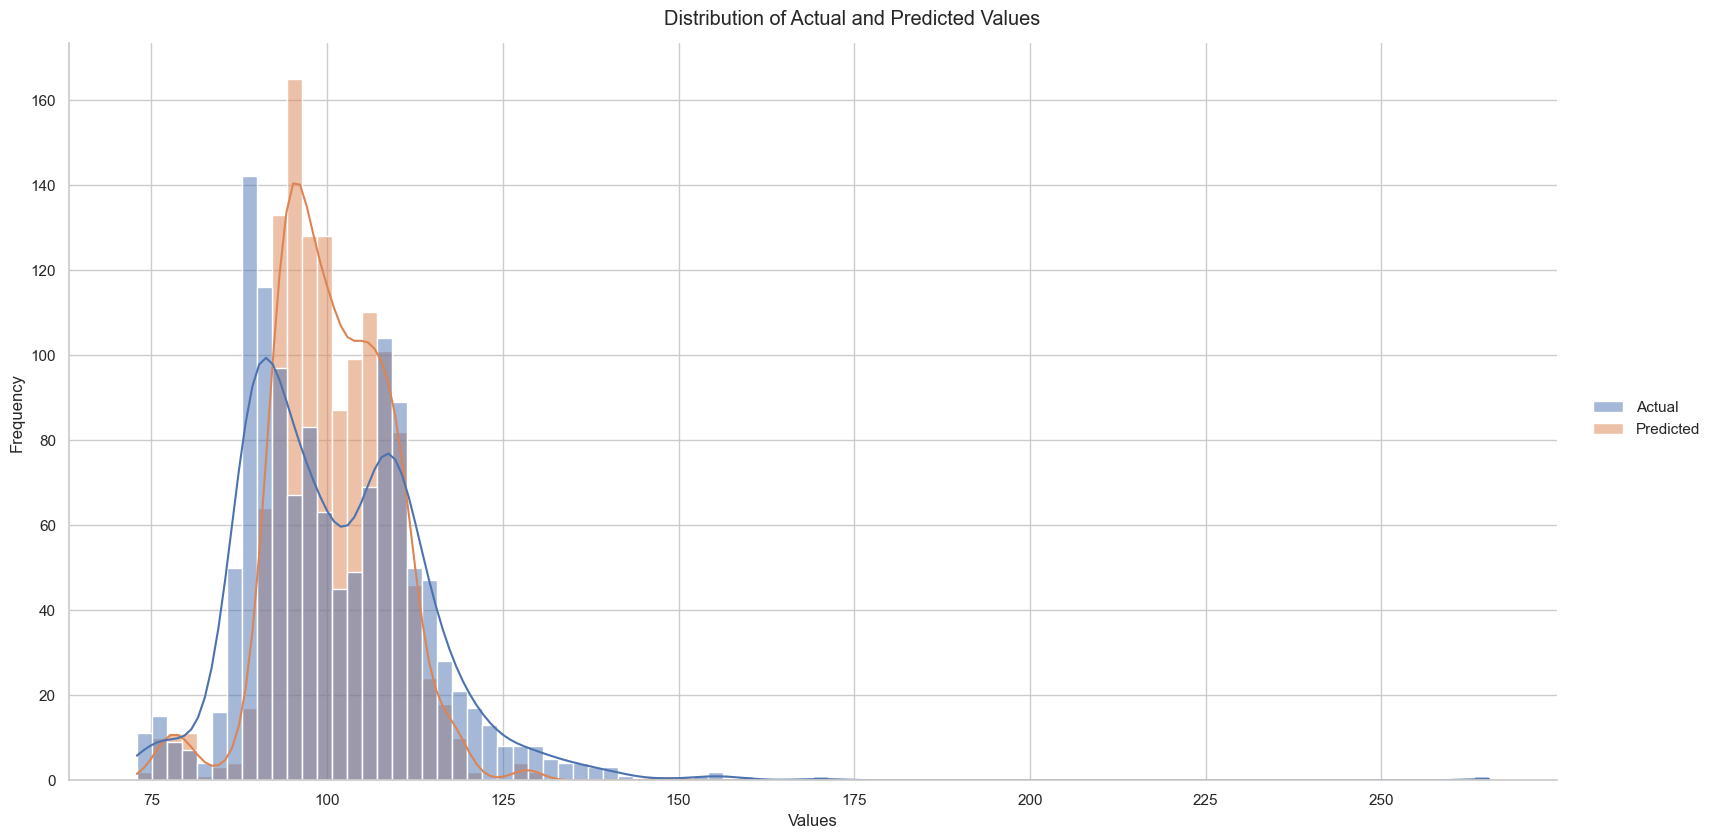

In [71]:
# Creating the distribution plot
plot = sns.displot(data=df, kde=True, height=8, aspect=2)
plot.set_axis_labels("Values", "Frequency")
plot.fig.suptitle('Distribution of Actual and Predicted Values', y=1.02)
# Show the plot
plt.show()

### Hyperparameter Tuning using Grid Search

In [72]:
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [5, 6, 7],
    'n_estimators': [20, 30, 40]
}

In [73]:
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [74]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.2, max...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=7, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=30,
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='reg:linear', ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [5, 6, 7], 'n_estimators': [20, 30, 40]},
             verbose=2)

In [75]:
# Getting the best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 40}


In [76]:
# Building the model with the best parameters
best_xgbr = xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.5, learning_rate=best_params['learning_rate'],max_depth=best_params['max_depth'],n_estimators=best_params['n_estimators'])

In [77]:
best_xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=40, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [78]:
# Making predictions on the validation set with the best model
best_preds = best_xgbr.predict(X_test)

In [79]:
best_rmse = np.sqrt(mean_squared_error(y_test, best_preds))

In [80]:
# Displaying the model performance after tuning
print("Best RMSE after tuning: %f" % (best_rmse))
print('Best r2_score after tuning: ', r2_score(y_test, best_preds))

Best RMSE after tuning: 11.252240
Best r2_score after tuning:  0.2917834921180851


### Predictions on Test Data

In [81]:
# Predict on test data using the best model
test_preds = best_xgbr.predict(Final_X_test_transformed)

In [82]:
# Displaying the predictions on the test data
print("Predictions on the test data:")
print(test_preds)

Predictions on the test data:
[ 79.98787  105.03395   95.04669  ... 103.711685 104.94805  101.07462 ]


In [83]:
# Creating a DataFrame with the ID column and predictions
output_df = pd.DataFrame({'ID': test_df['ID'], 'y': test_preds})

In [84]:
output_df

,ID,y
0,1,79.987869
1,2,105.033951
2,3,95.046692
3,4,91.216881
4,5,102.211876
...,...,...
4204,8410,107.010094
4205,8411,97.876816
4206,8413,103.711685
4207,8414,104.948051


In [85]:
# Saving the DataFrame to a CSV file
output_df.to_csv('Prediction.csv', index=False)

In [86]:
# Again checking the shapes of transformed train data and target variable
print("Shape of Final_X_train_transformed:", Final_X_train_transformed.shape)
print("Shape of y_train:", y_train_copy.shape)

Shape of Final_X_train_transformed: (4209, 6)
Shape of y_train: (4209,)


### Kfold Cross Validation with RandomizedSearchCV to find the best parameters

In [87]:
# Set a random seed for reproducibility
random_state = 4242

In [88]:
# Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(Final_X_train_transformed, y_train_copy, test_size=0.2, random_state=4242)

In [89]:
# Define a custom scoring function to calculate RMSE
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [90]:
# Define the parameter grid for random search
param_dist = {
    'learning_rate': [0.02, 0.05, 0.1, 0.2],
    'max_depth': [4, 5, 6, 7],
    'n_estimators': [10, 20, 30, 40],
    'colsample_bytree': [0.45, 0.50, 0.6, 0.7, 1.0]
}

In [91]:
# Create the XGBoost model
xgbr = xgb.XGBRegressor(objective='reg:linear')

In [92]:
# Perform K-fold cross-validation with random search
kf = KFold(n_splits=13, shuffle=True, random_state=4242)

In [93]:
random_search = RandomizedSearchCV(estimator=xgbr, param_distributions=param_dist, n_iter=40, cv=kf, n_jobs=-1, scoring=make_scorer(rmse_scorer, greater_is_better=False), random_state=4242)

In [94]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=13, random_state=4242, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          objective='reg:linear', ...),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.45, 0.5, 0.6,
                                                             0.7, 1.0],
                                        'learning_rate': [0.02, 0.05, 0.1, 0.2],
                                        'max_depth': [4, 5, 6, 7],
                                        'n_estimators': [10, 20, 30, 40]},
                   random_state=4242,
                   scoring=make_scorer(rmse_scorer, greater_is_better=False))

In [95]:
# Get the best parameters from random search
best_params = random_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'n_estimators': 40, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


In [96]:
# Train the final model with the best parameters
xgbr_best = xgb.XGBRegressor(objective='reg:linear', **best_params)

In [97]:
xgbr_best.fit(X_train, y_train, eval_metric="rmse", eval_set=[(X_train, y_train), (X_valid, y_valid)], early_stopping_rounds=1, verbose=True)

[0]	validation_0-rmse:12.14276	validation_1-rmse:11.11439
[1]	validation_0-rmse:11.61985	validation_1-rmse:10.58670
[2]	validation_0-rmse:11.23708	validation_1-rmse:10.22761
[3]	validation_0-rmse:10.88403	validation_1-rmse:9.91344
[4]	validation_0-rmse:10.63431	validation_1-rmse:9.69145
[5]	validation_0-rmse:10.47990	validation_1-rmse:9.58799
[6]	validation_0-rmse:10.26181	validation_1-rmse:9.49428
[7]	validation_0-rmse:10.09721	validation_1-rmse:9.41754
[8]	validation_0-rmse:10.00043	validation_1-rmse:9.34202
[9]	validation_0-rmse:9.89744	validation_1-rmse:9.27018
[10]	validation_0-rmse:9.82136	validation_1-rmse:9.26285
[11]	validation_0-rmse:9.71762	validation_1-rmse:9.24684
[12]	validation_0-rmse:9.61939	validation_1-rmse:9.22065
[13]	validation_0-rmse:9.53394	validation_1-rmse:9.19613
[14]	validation_0-rmse:9.39030	validation_1-rmse:9.20527


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=40, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [98]:
# Make predictions on the training set
preds_train = xgbr_best.predict(X_train)

In [99]:
# Make predictions on the validation set
preds_valid = xgbr_best.predict(X_valid)

In [100]:
# Calculate RMSE for the training set
rmse_train = rmse_scorer(y_train, preds_train)
print("RMSE on the training set:", rmse_train)

RMSE on the training set: 9.533944047798038


In [101]:
# Calculate RMSE for the validation set
rmse_valid = rmse_scorer(y_valid, preds_valid)
print("RMSE on the validation set:", rmse_valid)

RMSE on the validation set: 9.196126721821981


### Predictions on Test Data Using XgBoost

In [102]:
# Make predictions on the test set
preds_test = xgbr_best.predict(Final_X_test_transformed)

In [103]:
# Display the predictions on the test data
print("Predictions on the test data:")
print(preds_test)

Predictions on the test data:
[ 80.018326  97.78724   97.737816 ... 104.67179  108.53205   98.01387 ]


In [104]:
# Creating a DataFrame with the ID column and predictions
FinalOutput = pd.DataFrame()
FinalOutput['ID'] = id_test
FinalOutput['y'] = preds_test

In [105]:
# Saving the final predictions to a CSV file
FinalOutput.to_csv('Finalpredictions.csv', index=False)

In [106]:
# Displaying the first 30 rows of the final predictions
FinalOutput.head(30)

,ID,y
0,1,80.018326
1,2,97.787239
2,3,97.737816
3,4,86.885231
4,5,106.913811
5,8,93.962547
6,10,93.150291
7,11,94.715431
8,12,114.863129
9,14,96.264915
